**MID EXAM Computer Vision**

**Nomor 2**

Nama  : Rio Pramana

NIM   : 2440016804

Kelas : LA01

Penjelasan akan diberikan pada markdown cell dan juga comment pada code

# Idea of bandpass filter

The idea of bandpass filter that I am going to use here is to get the bandpass filtered image using 3 other images: lowpass filtered image, highpass filtered image, and bandreject image

I will first apply lowpass filter to the noisy_lena image, then i will apply highpass filter to the same image (but with different value of D0 because in order for this to work, the lowpass and the highpass have to have different value of D0)

To get the bandreject image, all i have to do is add the lowpass filtered image and highpass filtered image together

Then, to finally get the bandpass filtered image, I just need to substract the original image with the bandreject image

My references:

https://medium.com/computational-photography/lowpass-highpass-bandreject-and-bandpass-filters-in-image-processing-cf4341bfe61b

https://blog.minhazav.dev/lowpass-highpass-band-reject-and-band-pass-filter/#bandpass-filter

# Implementation of bandpass filter

### Import libraries

In [1]:
#Import libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Load image (grayscale)

Assuming the image is in the same folder as the .ipynb:

In [2]:
#Load image from files, using 0 to transform the image into grayscale
img = cv2.imread('noisy_lena.png', 0)

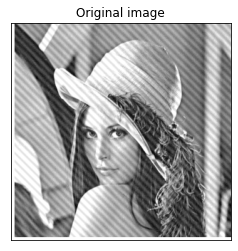

In [3]:
# Display the image
fig = plt.figure()
# First image
plt.imshow(img, cmap='gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.show()

## Lowpass filtering

In [4]:
# Do dft complex output
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Shift the origin to the centre of the img
dft_shift = np.fft.fftshift(dft)

# Generate the spectrum from the magnitude of the image to be shown/viewed
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

Creating the filter:

In [5]:
#Create the Gaussian low pass filter (L)
original = np.fft.fft2(img) # get the img in frequency domain
Fshift = np.fft.fftshift(original) # save the shift of the origin to the centre of img

In [6]:
#Save the shape of the image
row,col = img.shape
L = np.zeros((row,col), dtype=np.float32) #the filter

# After some tuning, I found that D0 = 5 gives a good result
D0 = 5
for u in range(row):
    for v in range(col):
        D = np.sqrt((u-row/2)**2 + (v-col/2)**2)
        L[u,v] = np.exp(-D**2/(2*D0*D0))

After some trial, I decided to use D0 = 5 for the lowpass because it was able to get rid of most of the noise in the final bandpass filtered image while not blurring the final image by too much

Applying the filter to the image:

In [7]:
#Doing the filtering
Gshift = Fshift * L #Do the low pass filtering
#Inverse it
G = np.fft.ifftshift(Gshift)
#Get the image after low pass filtering
lowpass_filtered_img = np.abs(np.fft.ifft2(G))

Visualizing the results:

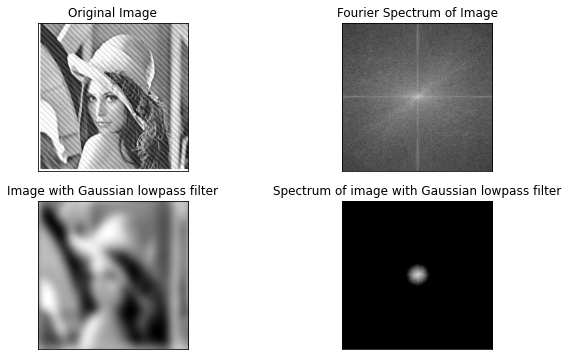

In [8]:
#Showing the results
fig = plt.figure(figsize=(10,6))

#Original image
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

#The fourier spectrum
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum of Image'), plt.xticks([]), plt.yticks([])

#After low pass filtering
plt.subplot(223),plt.imshow(lowpass_filtered_img, cmap = 'gray')
plt.title('Image with Gaussian lowpass filter'), plt.xticks([]), plt.yticks([])

#Spectrum with lowpass filter
plt.subplot(224),plt.imshow(np.log1p(np.abs(Gshift)), cmap = 'gray')
plt.title('Spectrum of image with Gaussian lowpass filter'), plt.xticks([]), plt.yticks([])

plt.show()

## Highpass filtering

To get a highpass filtered image, we can actually use a lowpass filtered image

**Highpass filtered image = original image - lowpass filtered image**

So, to get the highpass filtered image, I will make another lowpass filtered image, but this time the D0 value will be higher

Most of the process stays the same

A lot of variables such as dft, dft_shift, and magnitude spectrum of the original image will be the same so we do not have to compute it again

All we need to do is create a new filter with the new D0 value

In [9]:
# Create new L with new D0 value
new_L = np.zeros((row,col), dtype=np.float32) #the filter
new_D0 = 14
for u in range(row):
    for v in range(col):
        D = np.sqrt((u-row/2)**2 + (v-col/2)**2)
        new_L[u,v] = np.exp(-D**2/(2*new_D0*new_D0))

After some trial, I decided to use D0 = 14 for the lowpass (to get the highpass) because it gives a better visualization (we can still see the objects in the picture clearly while most of the noise are not visible)

In [10]:
#Doing the filtering
new_Gshift = Fshift * new_L #Do the low pass filtering
#Inverse it
new_G = np.fft.ifftshift(new_Gshift)
#Get the image after low pass filtering
new_lowpass = np.abs(np.fft.ifft2(new_G))

Get the highpass filtered image:

In [11]:
highpass_filtered_img = img - new_lowpass

Visualization:

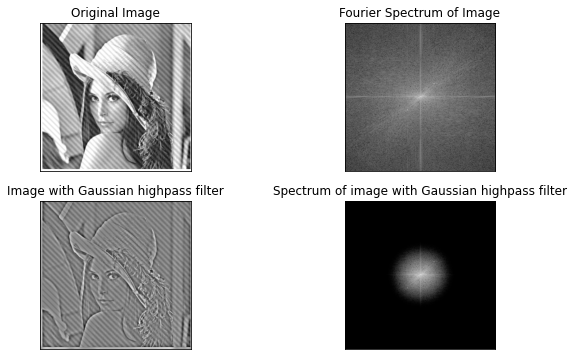

In [12]:
#Showing the results
fig = plt.figure(figsize=(10,6))

#Original image
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#The fourier spectrum
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum of Image'), plt.xticks([]), plt.yticks([])
#After low pass filtering
plt.subplot(223),plt.imshow(highpass_filtered_img, cmap = 'gray')
plt.title('Image with Gaussian highpass filter'), plt.xticks([]), plt.yticks([])
#Spectrum with lowpass filter
plt.subplot(224),plt.imshow(np.log1p(np.abs(new_Gshift)), cmap = 'gray')
plt.title('Spectrum of image with Gaussian highpass filter'), plt.xticks([]), plt.yticks([])

plt.show()

## Bandreject filtering

As I mentioned before, because we have already obtained the lowpass filtered image and the highpass filtered image, we can add both of those images to obtain the bandreject filtered image

In [13]:
bandreject_image = lowpass_filtered_img + highpass_filtered_img

Visualization:

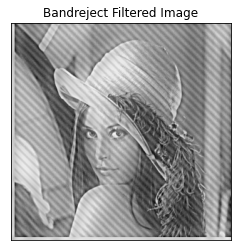

In [14]:
#Showing the results
fig = plt.figure()

#Original image
plt.imshow(bandreject_image, cmap = 'gray')
plt.title('Bandreject Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Bandpass filtering

Because we already have the bandreject image, we can subtract the original image with the bandreject image to get the bandpass filtered image (final image)

In [15]:
bandpass_image = img - bandreject_image

Visualization:

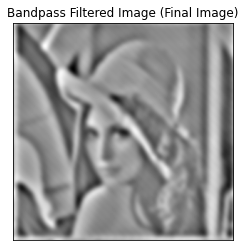

In [16]:
#Showing the results
fig = plt.figure()

#Original image
plt.imshow(bandpass_image, cmap = 'gray')
plt.title('Bandpass Filtered Image (Final Image)'), plt.xticks([]), plt.yticks([])

plt.show()

## Side by side comparison of the original and final image

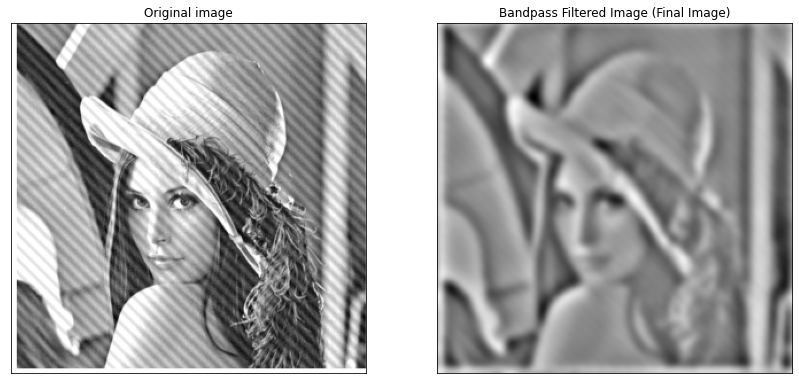

In [17]:
# Display the images
fig = plt.figure(figsize=(14,10))

# Original image
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

# Bandpass filtered image
plt.subplot(122),plt.imshow(bandpass_image, cmap = 'gray')
plt.title('Bandpass Filtered Image (Final Image)'), plt.xticks([]), plt.yticks([])

plt.show()